In [1]:
import numpy as np
import pandas as pd
from skbio.stats.composition import clr
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.diversity.alpha import shannon
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
def rescale(xx):
    return(xx/xx.sum(axis=1)[:, np.newaxis] )
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
            'grid.color': 'black'
            }, 
       font_scale=2)

def add_15_percent_to_top_ylim(ax):
    ylim=ax.get_ylim() 
    ax.set_ylim( ylim[0], ylim[1] + ( ylim[1] - ylim[0] ) * .15)
    return(None)

In [2]:
df = pd.read_csv('pnas.1502875112.sd01.csv', index_col=0)
md = pd.read_csv('pnas.1502875112.sd02.txt', sep='\t', index_col=0)
md = md.loc[ md.BodySite=='Vaginal_Swab' ]
md = md.loc[md.Gestational_status_at_collection=='pregnant']
md = md.sort_values('GestationalDayOfCollection').groupby('Subject_ID').head(1)

## to capture the 40th patient
df.index=df.index.str.replace('1004601068.rs', '1004601068') 
    
df = df.loc[df.index.isin(md.index)]
md = md.loc[md.index.isin(df.index)].loc[df.index]
df = df.loc[:, df.sum(axis=0)> 0]

In [3]:
md.shape

(40, 12)

In [4]:
df.shape

(40, 222)

In [5]:
taxa = pd.read_csv('../holmes-taxonomy-features.csv', index_col=0)

In [6]:
val=-2
(df.iloc[:, val] > 0 ).sum() ## this is a feature present in one sample

1

In [7]:
taxa.loc[int(df.iloc[:, val].name)]

Kingdom             Bacteria
Phylum          P:Firmicutes
Class           C:Clostridia
Order        O:Clostridiales
Family     F:Lachnospiraceae
Genus                Blautia
Species              Blautia
Name: 4465907, dtype: object

In [8]:
md.PretermBirth.value_counts()

False    29
True     11
Name: PretermBirth, dtype: int64

In [9]:
sh_alphas = [shannon(x) for x in df.values]

In [10]:
int(df.iloc[:, val].name)

4465907

In [11]:
taxa = pd.read_csv('../holmes-taxonomy-features.csv', index_col=0)
taxa.loc[int(df.iloc[:, val].name)]

Kingdom             Bacteria
Phylum          P:Firmicutes
Class           C:Clostridia
Order        O:Clostridiales
Family     F:Lachnospiraceae
Genus                Blautia
Species              Blautia
Name: 4465907, dtype: object

In [12]:
pr = pearsonr(md.PretermBirth, sh_alphas)

In [13]:
mw = mannwhitneyu( np.array(sh_alphas)[md.PretermBirth], 
                   np.array(sh_alphas)[md.PretermBirth==False]
                 )

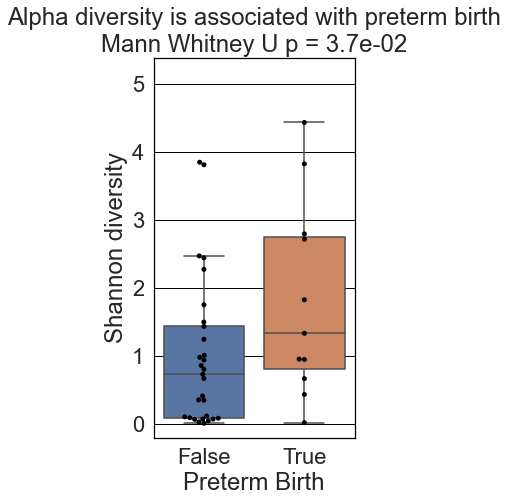

In [14]:
plt.figure(figsize=(12 * .3,7))
sns.boxplot(x = md.PretermBirth, 
            y=sh_alphas, 
            fliersize=0
           )


ax=sns.swarmplot(x = md.PretermBirth, 
              y=sh_alphas, 
              size=5, 
              color='black'
              )
add_15_percent_to_top_ylim(ax)
plt.ylabel('Shannon diversity')
plt.xlabel('Preterm Birth')
plt.title('Alpha diversity is associated with preterm birth\n'+\
#           'Pearson R = {:.2f}, p = {:.1e}, '.format(*pr)+\
          'Mann Whitney U p = {:.1e}'.format(mw.pvalue)
          )

plt.savefig('plots/Fig-2-vaginal-shannons.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

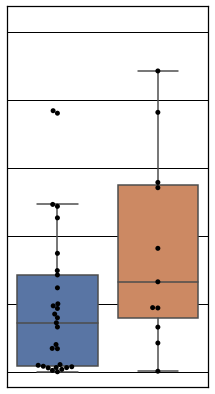

In [15]:
plt.figure(figsize=(12 * .3,7))
sns.boxplot(x = md.PretermBirth, 
            y=sh_alphas, 
            fliersize=0
           )


ax=sns.swarmplot(x = md.PretermBirth, 
              y=sh_alphas, 
              size=5, 
              color='black'
              )
add_15_percent_to_top_ylim(ax)
plt.ylabel('Shannon diversity')
plt.xlabel('Preterm Birth')
plt.title('Alpha diversity is associated with preterm birth\n'+\
#           'Pearson R = {:.2f}, p = {:.1e}, '.format(*pr)+\
          'Mann Whitney U p = {:.1e}'.format(mw.pvalue)
          )
ax.set(
       yticklabels=[], 
       xticklabels=[])
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)
plt.savefig('plots/Fig-2-vaginal-shannons-no-axes.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


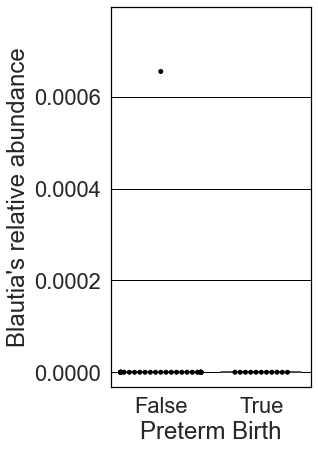

In [16]:
plt.figure(figsize=(12 * .3,7))
sns.boxplot(x = md.PretermBirth, 
            y=rescale(df.values)[:, val], 
            fliersize=0
           )


ax=sns.swarmplot(x = md.PretermBirth, 
              y=rescale(df.values)[:, val], 
              size=5, 
              color='black'
              )
add_15_percent_to_top_ylim(ax)
plt.ylabel("Blautia's relative abundance")
plt.xlabel('Preterm Birth')


plt.savefig('plots/Fig-2-Blautia-RA.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()



/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


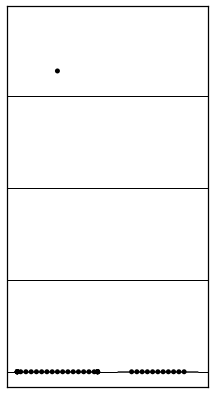

In [17]:
plt.figure(figsize=(12 * .3,7))
sns.boxplot(x = md.PretermBirth, 
            y=rescale(df.values)[:, val], 
            fliersize=0
           )


ax=sns.swarmplot(x = md.PretermBirth, 
              y=rescale(df.values)[:, val], 
              size=5, 
              color='black'
              )
add_15_percent_to_top_ylim(ax)
plt.ylabel("Blautia's relative abundance")
plt.xlabel('Preterm Birth')

ax.set(
       yticklabels=[], 
       xticklabels=[])
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)
plt.savefig('plots/Fig-2-Blautia-RA-no-axes.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()



In [18]:
X_clr = clr(rescale(df.values) + 1e-5)

In [19]:
pearsonr(md.PretermBirth, X_clr[:, -1])

(-0.08415624602202375, 0.6056514564238772)

In [20]:
mannwhitneyu(np.array(X_clr[:, val])[md.PretermBirth], 
             np.array(X_clr[:, val])[md.PretermBirth==False]
             )

MannwhitneyuResult(statistic=80.0, pvalue=0.00835715834189919)

In [21]:
pr = pearsonr(md.PretermBirth, X_clr[:, val])
mw = mannwhitneyu( np.array(X_clr[:, val])[md.PretermBirth], 
                   np.array(X_clr[:, val])[md.PretermBirth==False],
            )

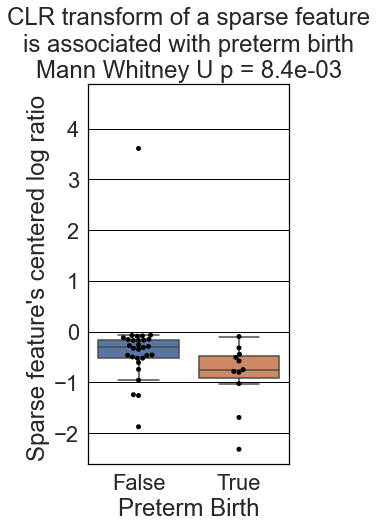

In [22]:
plt.figure(figsize=(12 * .3,7))
sns.boxplot(x = md.PretermBirth, 
            y=X_clr[:, val], 
            fliersize=0
           )


ax=sns.swarmplot(x = md.PretermBirth, 
              y=X_clr[:, val], 
              size=5, 
              color='black'
              )
add_15_percent_to_top_ylim(ax)
plt.ylabel("Sparse feature's centered log ratio ")
plt.xlabel('Preterm Birth')
plt.title('CLR transform of a sparse feature\nis associated with preterm birth\n'+\
#           'Pearson R = {:.2f}, p = {:.1e}, '.format(*pr)+\
          'Mann Whitney U p = {:.1e}'.format(mw.pvalue)
          )

plt.savefig('plots/Fig-2-vaginal-clr.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()


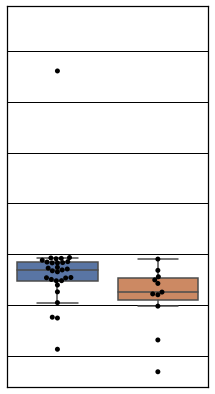

In [23]:
plt.figure(figsize=(12 * .3,7))
sns.boxplot(x = md.PretermBirth, 
            y=X_clr[:, val], 
            fliersize=0
           )


ax=sns.swarmplot(x = md.PretermBirth, 
              y=X_clr[:, val], 
              size=5, 
              color='black'
              )
add_15_percent_to_top_ylim(ax)
plt.ylabel("Sparse feature's centered log ratio ")
plt.xlabel('Preterm Birth')
plt.title('CLR transform of a sparse feature\nis associated with preterm birth\n'+\
#           'Pearson R = {:.2f}, p = {:.1e}, '.format(*pr)+\
          'Mann Whitney U p = {:.1e}'.format(mw.pvalue)
          )
ax.set(
       yticklabels=[], 
       xticklabels=[])
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)
plt.savefig('plots/Fig-2-vaginal-clr-no-axes.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
pr = pearsonr(sh_alphas, X_clr[:, val])

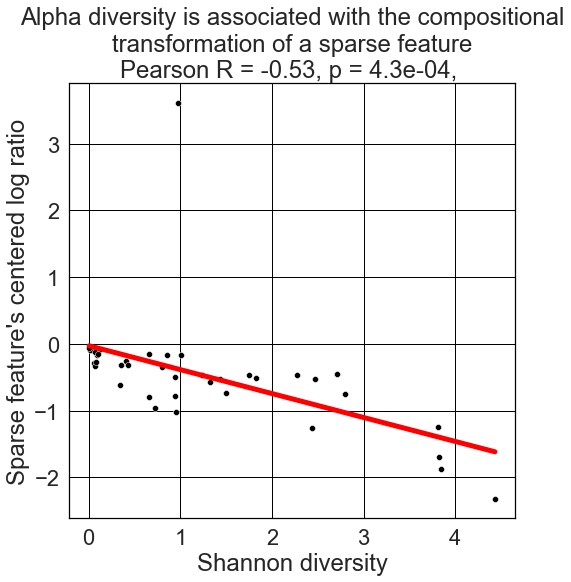

In [26]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x = sh_alphas, 
                y=X_clr[:, val], 
                color='black',
#                 fliersize=0
               )


lr = LinearRegression()
sns.lineplot(x = sh_alphas, 
             y=lr.fit(np.array(sh_alphas)[:, np.newaxis], 
                                    X_clr[:, val])\
                         .predict(np.array(sh_alphas)[:, np.newaxis]), 
             color='red',
             linewidth=5, 
             ax=ax
               )
plt.title('Alpha diversity is associated with the compositional\ntransformation of a sparse feature\n'+\
          'Pearson R = {:.2f}, p = {:.1e}, '.format(*pr)
         )
plt.xlabel('Shannon diversity')
    
plt.ylabel("Sparse feature's centered log ratio")

plt.savefig('plots/Fig-2-vaginal-shannon-clr-scatter.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()


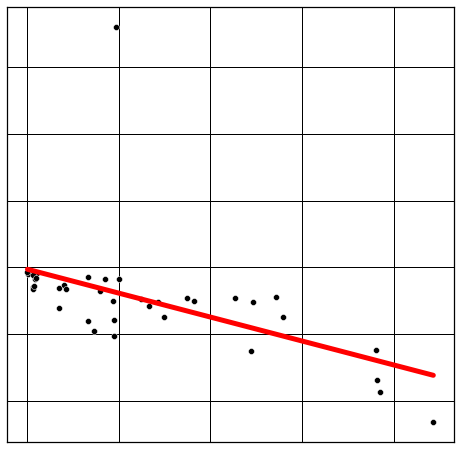

In [27]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x = sh_alphas, 
                y=X_clr[:, val], 
                color='black',
#                 fliersize=0
               )


lr = LinearRegression()
sns.lineplot(x = sh_alphas, 
             y=lr.fit(np.array(sh_alphas)[:, np.newaxis], 
                                    X_clr[:, val])\
                         .predict(np.array(sh_alphas)[:, np.newaxis]), 
             color='red',
             linewidth=5, 
             ax=ax
               )
plt.title('Alpha diversity is associated with the compositional\ntransformation of a sparse feature\n'+\
          'Pearson R = {:.2f}, p = {:.1e}, '.format(*pr)
         )
plt.xlabel('Shannon diversity')
    
plt.ylabel("Sparse feature's centered log ratio")

ax.set(
       yticklabels=[], 
       xticklabels=[])
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)
plt.savefig('plots/Fig-2-vaginal-shannon-clr-scatter-no-axes.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

